# Исследование объявлений о продаже квартир

В качестве исходных данных выступает архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Часть данных была заполнена пользователем, часть - формируется автоматически на основе картографических данных.

Цель исследования: установить параметры, влияющие на рыночную стоимость объектов недвижимости.
 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv()
except:
    data = pd.read_csv()
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Запомним, сколько было данных до предобработки.

In [3]:
old_data_shape = data.shape[0]
print('Исходное количество единиц наблюдения:', old_data_shape)

Исходное количество единиц наблюдения: 23699


In [4]:
pd.set_option('display.max_columns', 50)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Из общей информации по датасету можно выделить следующие направления предобработки, которые необходимо выполнить:**

1. В большей части столбцов имеются пустые значения. Необходимо заполнить недостающими данными там, где это возможно, остальные исключить из анализа.
2. В столбцах first_day_exposition и is_apartment тип данных не соответствует описанию показателей. Тип данных необходимо скорректировать.

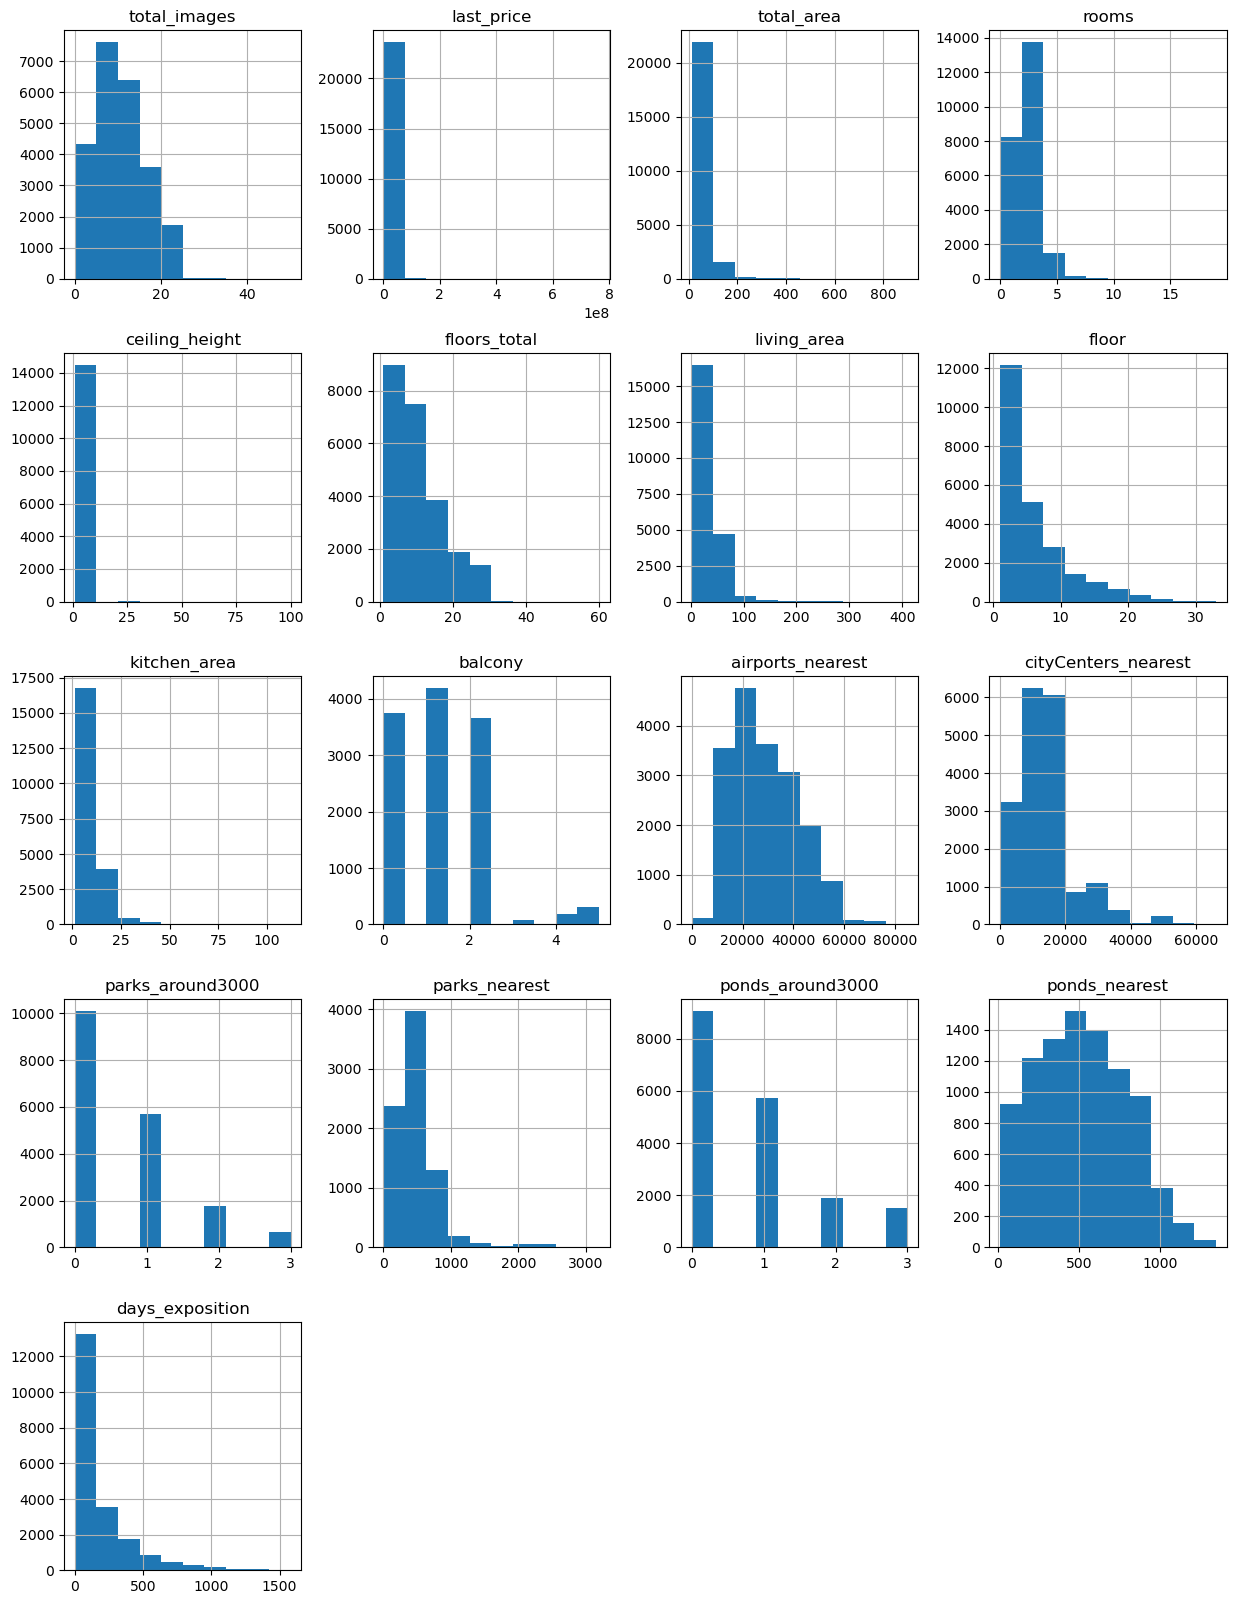

In [5]:
data.hist(figsize=(15, 20));

По гистограммам видно, что артефакты и выбросы могут быть в следующих показателях:
- last_price,
- total_area,
- rooms,
- ceiling_height,
- floors_total,
- living_area,
- kitchen_area.

### Предобработка данных

Из общей информации по датасету мы знаем, что в отдельных столбцах есть пропущенные значения. Посмотрим, какие это показатели, как много пропущенных значений в них, и последовательно обработаем каждый из них.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Предобработка столбца ceiling_height**

Судя по гистограммам, в данном столбце имеются артефакты. Высота потолков больше 10 м и меньше 2 м кажется неправдоподобной. Посмотрим на эти объекты.

In [7]:
data[(data['ceiling_height'] > 10) | (data['ceiling_height'] < 2)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.00,14.0,32.4,5,NaN,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.00,17.0,53.2,14,NaN,False,False,12.00,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.60,14.0,35.0,11,NaN,False,False,13.00,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,False,False,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.00,5.0,29.0,3,False,False,False,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0


Можно предположить, что по объектам с высотой потолков более 20 м произошла ошибка и разделитель десятичной дроби оказался не на своем месте. Чтобы это устранить, разделим высоту потолка для приведенных выше объектов на 10.

Объекты с высотой потолков 10,3 м, 14 м и менее 2 м выглядят неправдоподобно, поэтому их лучше исключить, чтобы не искажать результаты анализа.

In [8]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height'] / 10)
data = data.drop([22590, 5712, 16934, 22309, 15061])

print(
    'Количество квартир с высотой потолка больше 10 м: {}\nКоличество квартир с высотой потолка меньше 2 м: {}'.format(
        data.loc[data['ceiling_height'] > 10, 'ceiling_height'].count(),
        data.loc[data['ceiling_height'] < 2, 'ceiling_height'].count()
    )
)

Количество квартир с высотой потолка больше 10 м: 0
Количество квартир с высотой потолка меньше 2 м: 0


Можно предположить, что на высоту потолка оказывает влияние тип здания. Из представленных данных его можно попытаться определить по этажности, т.е. по столбцу floors_total.
Проверим, как отличается медиана высоты потолка в зависимости от этажности здания.

In [9]:
data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])

,median,count
,ceiling_height,ceiling_height
floors_total,,
1.0,2.80,10
2.0,2.70,214
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666
6.0,3.00,619
7.0,3.00,398
8.0,2.80,220


Действительно, типовые здания с 5 и 9 этажами имеют высоту потолка, близкую к стандартным 2,5 м. Самые высокие потолки имеются в нестандартных 1-4- и 6-8-этажных зданиях. В зданиях с более 9 этажами медианная высота потолка преимущественно 2,7-2,75 м, хоть и имеется небольшая вариация.

Исходя из этого, пропуски в столбце ceiling_height можно заполнить медианным значением по типу этажности здания: до 5 этажей, 5 этажей, от 6 до 9 этажей, 9 этажей, более 9 этажей.

In [10]:
def categorize_building(floors):
    if 1 <= floors <= 4:
        return 'менее 5 этажей'
    elif floors == 5:
        return '5 этажей'
    elif 6 <= floors <= 8:
        return '6-8 этажей'
    elif floors == 9:
        return '9 этажей'
    elif floors >= 10:
        return 'более 9 этажей'
    else:
        return 'unknown'
    
data['building_type'] = data['floors_total'].apply(categorize_building)

for t in data['building_type'].unique():
    data.loc[(data['building_type'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['building_type'] == t), 'ceiling_height'].median()
    
print('Количество нулевых значений в столбце ceiling_height:', data['ceiling_height'].isna().sum())

Количество нулевых значений в столбце ceiling_height: 0


**Предобработка столбца floors_total**

В данном столбце 86 пропусков. Посмотрим, на каком этаже находились квартиры.

In [11]:
data[data['floors_total'].isna() == True]['floor'].unique()

array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10], dtype=int64)

Никакой закономерности здесь не видно, поэтому оставим эти пропущенные значения, их не так много.

**Предобработка столбца living_area**

Логично предположить, что жилая площадь сильно зависит от общей площади. Проверим это.

In [12]:
print('Коэффициент корреляции Пирсона равен', data['total_area'].corr(data['living_area']).round(4))

Коэффициент корреляции Пирсона равен 0.9395


Действительно, между данными в столбцах total_area и living_area подтверждена очень сильная линейная связь.

Теперь проверим, как соотносятся между собой общая и жилая площадь

In [13]:
(data['living_area'] / data['total_area']).describe()

count    21791.000000
mean         0.564776
std          0.105365
min          0.021583
25%          0.495179
50%          0.567835
75%          0.637881
max          1.000000
dtype: float64

По показателям видно, что вариация доли жилой площади от общей небольшая: значение стандартного отклонения невелико относительно среднего значения, которое, к тому же, не сильно отличается от медианы.

Поэтому заполнить нулевые значения столбца living_area можно с учетом медианной доли от общей площади, т.е. total_area.

In [14]:
data['living_area'] = data['living_area'].fillna(value=0.5678*data['total_area'])
print('Количество нулевых значений в столбце living_area:', data['living_area'].isna().sum())

Количество нулевых значений в столбце living_area: 0


**Предобработка столбца is_apartment**

Судя по исходной информации о показателях, в данном столбце должны быть представлены булевы значения True и False. 

Если продавец не указал на то, что квартира относится к категории апартаментов, можно предположить, что она таковой не является. Поэтому пропуски в этом столбце можно заполнить значением False.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
print('Количество нулевых значений в столбце is_apartment:', data['is_apartment'].isna().sum())

Количество нулевых значений в столбце is_apartment: 0


Проверим, как изменился тип данных в столбце.

In [16]:
print('Тип данных в столбце is_apartment:', data['is_apartment'].dtypes)

Тип данных в столбце is_apartment: bool


**Предобработка столбца kitchen_area**

Пропуски в этом столбце можно заполнить по медианной доле кухни от общей площади квартиры. Такая возможность подтверждается достаточно сильной корреляцией между показателями.

In [17]:
print('Коэффииент корреляции Пирсона равен', data['kitchen_area'].corr(data['total_area']).round(4))

Коэффииент корреляции Пирсона равен 0.6091


In [18]:
(data['kitchen_area'] / data['total_area']).describe()

count    21417.000000
mean         0.187358
std          0.072973
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232432
max          0.787879
dtype: float64

Отдельно заменим пустые ячейки в столбце kitchen_area для студий: для них указываются нулевые значения площади кухни.

In [19]:
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['total_area']*0.1724)
data['kitchen_area'] = data['kitchen_area'].where(data['studio'] == False, 0)
print('Количество нулевых значений в столбце kitchen_area:', data['kitchen_area'].isna().sum())

Количество нулевых значений в столбце kitchen_area: 0


**Предобработка столбца balcony**

Исходя из исходной информации, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Пропуски заменим на 0. 

In [20]:
data['balcony'] = data['balcony'].fillna(value=0)
print('Количество нулевых значений в столбце balcony:', data['balcony'].isna().sum())

Количество нулевых значений в столбце balcony: 0


**Предобработка столбца locality_name**

Для начала посмотрим, какие значения находятся в этом столбце.

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В столбце есть неявные дубликаты. Проведем следующие корректировки, чтобы их минимизировать:
- заменим "ё" на "е";
- "садовое товарищество" и "садовое некоммерческое товарищество" приведем к единому виду "СНТ";
- уберем из названия вид населенного пункта, т.к. при внесении данных продавец мог его не указать или указать неправильно.

In [22]:
print('Количество населенных пунктов до устранения дубликотов:', len(data['locality_name'].unique()))

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'СНТ')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', 'СНТ ')

locality_type = [' городского типа', 'городской ', 'коттеджный ',
                 'при железнодорожной станции ', 'поселок ',
                 'деревня ', 'село ', 'имени ', 'станции '
                ]
for i in range(len(locality_type)):
    data['locality_name'] = data['locality_name'].str.replace(locality_type[i], '')

print('Количество населенных пунктов после устранения дубликотов:', len(data['locality_name'].unique()))

Количество населенных пунктов до устранения дубликотов: 365
Количество населенных пунктов после устранения дубликотов: 308


Пустые ячейки заполним словом "unknown"

In [23]:
data['locality_name'] = data['locality_name'].fillna(value='unknown')
print('Количество нулевых значений в столбце locality_name:', data['locality_name'].isna().sum())

Количество нулевых значений в столбце locality_name: 0


**Предобработка столбцов parks_nearest, ponds_nearest**

Можно предположить, что данные не указаны в случае отсутствия парков и водоемов в радиусе 3 км. Проверим это.

In [24]:
print('Распределение количества пропущенных значений по паркам:')
print(data[data['parks_nearest'].isna()]['parks_around3000'].value_counts())

print('\nРаспределение количества пропущенных значений по водоемам:')
print(data[data['ponds_nearest'].isna()]['ponds_around3000'].value_counts())

Распределение количества пропущенных значений по паркам:
0.0    10100
Name: parks_around3000, dtype: int64

Распределение количества пропущенных значений по водоемам:
0.0    9070
Name: ponds_around3000, dtype: int64


Наше предположение оказалось верно, поэтому пропуски в столбцах можно заполнить условным значением, превышающим 3 км.

Проверим максимальные значения по столбцам.

In [25]:
print('Максимальное расстояние до парка:', data['parks_nearest'].max())
print('Максимальное расстояние до водоема:', data['ponds_nearest'].max())

Максимальное расстояние до парка: 3190.0
Максимальное расстояние до водоема: 1344.0


Заполним пропуски значением 3500.

In [26]:
data['parks_nearest'] = data['parks_nearest'].fillna(value=3500)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=3500)
print('Количество нулевых значений в столбце parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество нулевых значений в столбце ponds_nearest:', data['ponds_nearest'].isna().sum())

Количество нулевых значений в столбце parks_nearest: 0
Количество нулевых значений в столбце ponds_nearest: 0


**Предобработка столбцов airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000**

Проверим, сколько данных можно заполнить средним/медианным значением по населенному пункту.

In [27]:
print('Всего населенных пунктов:', len(data['locality_name'].unique()))
print('   С пропущенными значениями по airports_nearest:',
      len(data[data['airports_nearest'].isna()]['locality_name'].unique()))
print('   Где есть хотя бы одно значение по airports_nearest:',
      len(data[data['airports_nearest'].isna() == False]['locality_name'].unique()))
print()
print('   С пропущенными значениями по cityCenters_nearest:',
      len(data[data['cityCenters_nearest'].isna()]['locality_name'].unique()))
print('   Где есть хотя бы одно значение по cityCenters_nearest:',
      len(data[data['cityCenters_nearest'].isna() == False]['locality_name'].unique()))
print()
print('   С пропущенными значениями по parks_around3000:',
      len(data[data['parks_around3000'].isna()]['locality_name'].unique()))
print('   Где есть хотя бы одно значение по parks_around3000:',
      len(data[data['parks_around3000'].isna() == False]['locality_name'].unique()))
print()
print('   С пропущенными значениями по ponds_around3000:',
      len(data[data['ponds_around3000'].isna()]['locality_name'].unique()))
print('   Где есть хотя бы одно значение по ponds_around3000:',
      len(data[data['ponds_around3000'].isna() == False]['locality_name'].unique()))

Всего населенных пунктов: 308
   С пропущенными значениями по airports_nearest: 289
   Где есть хотя бы одно значение по airports_nearest: 28

   С пропущенными значениями по cityCenters_nearest: 290
   Где есть хотя бы одно значение по cityCenters_nearest: 28

   С пропущенными значениями по parks_around3000: 289
   Где есть хотя бы одно значение по parks_around3000: 28

   С пропущенными значениями по ponds_around3000: 289
   Где есть хотя бы одно значение по ponds_around3000: 28


Судя по данным, в этих столбцах имеются пустые значения по целым населенным пунктам. Поэтому восстановить их без потери качества данных не получится. Оставим эти пропуски как есть, и дальше в анализе будем это учитывать.

**Предобработка столбца first_day_exposition**

Преобразуем данные в столбце в формат даты и времени.

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print('Тип данных в столбце first_day_exposition:', data['first_day_exposition'].dtypes)

Тип данных в столбце first_day_exposition: datetime64[ns]


**Предобработка столбца days_exposition**

В данном столбце наличие пропусков, скорее всего, связано с тем, что на момент выгрузки данных объявления не были еще сняты. Об этом говорит распределение таких объявлений по годам.

In [29]:
data[data['days_exposition'].isna()]['first_day_exposition'].dt.year.value_counts()

2019    1796
2018     959
2017     271
2015      70
2016      67
2014      18
Name: first_day_exposition, dtype: int64

In [30]:
data['days_exposition'].describe()

count    20513.000000
mean       180.894555
std        219.747583
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Третий квартиль длительности размещения объявлений не превышает года, а пропуски встречаются в объявлениях, начиная с 2014 года. Это говорит, о том, что продавец, скорее всего, просто не снял объявление с сервиса.

Что касается объявлений 2019 года, то эти объекты просто еще не успели продаться.

В обоих видах пропусков спрогнозировать с высокой точностью период продажи объекта мы не сможем. Заменять средним или медианным значением нецелесообразно, поскольку вариация признака слишком велика.

Поэтому в данном столбце придется оставить пропуски.

**Изменение типа данных в столбце balcony**

В столбце balcony указано количество балконов, т.е. величина дискретная. Сейчас тип данных в этом столбце соответствует непрерывной величине. Изменим тип данных на "int".

In [31]:
data['balcony'] = data['balcony'].astype('int')
print('Тип данных в столбце balcony:', data['balcony'].dtypes)

Тип данных в столбце balcony: int32


**Устранение редких и выбивающихся значений**

Ранее мы увидели по гистограммам, что в нескольких столбцах возможно наличие артефактов. Устраним их.

*Столбец last_price*

Посмотрим на показатели описательной статистики. Для наглядности анализировать характеристики будем в миллионах рублей.

In [32]:
(data['last_price'] / 1000000).describe()

count    23694.000000
mean         6.541980
std         10.888096
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Уже по этим данным видно, что объект, проданный за 763 млн рублей, является выбросом.

Посмотрим на диаграмму размаха.

(0.0, 30000000.0)

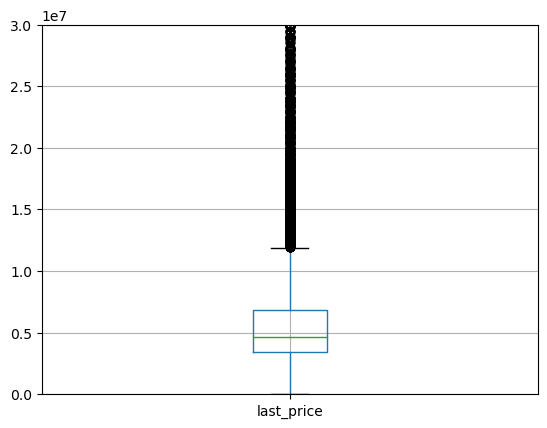

In [33]:
data.boxplot('last_price')

plt.ylim(0, 30000000)

In [34]:
print('Количество объектов, проданных более, чем за 14 млн рублей:',
      data[data['last_price'] > 14000000]['last_price'].count())

Количество объектов, проданных более, чем за 14 млн рублей: 1394


Объектов, проданных более, чем за 14 млн рублей не так много, поэтому их можно исключить из дальнейшего анализа.

In [35]:
data = data.query('last_price <= 14000000')

*Столбец total_area*

Посмотрим на показатели описательной статистики и диаграмму размаха.

In [36]:
data['total_area'].describe()

count    22300.000000
mean        54.752293
std         21.194283
min         12.000000
25%         39.200000
50%         50.000000
75%         65.100000
max        320.000000
Name: total_area, dtype: float64

(0.0, 200.0)

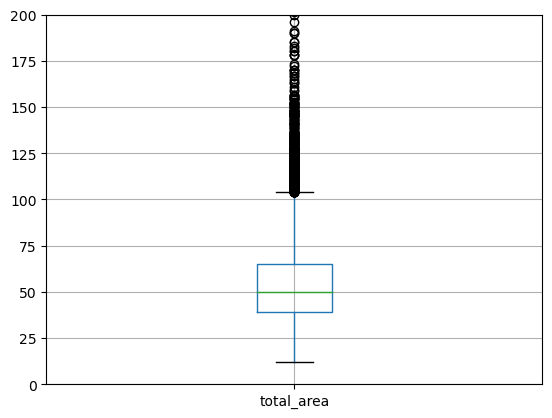

In [37]:
data.boxplot('total_area')

plt.ylim(0, 200)

In [38]:
print('Количество объектов с общей площадью более 150 м²:',
      data[data['total_area'] > 150]['total_area'].count())

Количество объектов с общей площадью более 150 м²: 58


Объектов с общей площадью более 150 м² не так много, поэтому их можно исключить из дальнейшего анализа.

In [39]:
data = data.query('total_area <= 150')

*Столбец living_area*

Посмотрим на показатели описательной статистики и диаграмму размаха.

In [40]:
data['living_area'].describe()

count    22242.000000
mean        31.214979
std         14.012379
min          2.000000
25%         18.600000
50%         29.537800
75%         40.000000
max        128.000000
Name: living_area, dtype: float64

(0.0, 125.0)

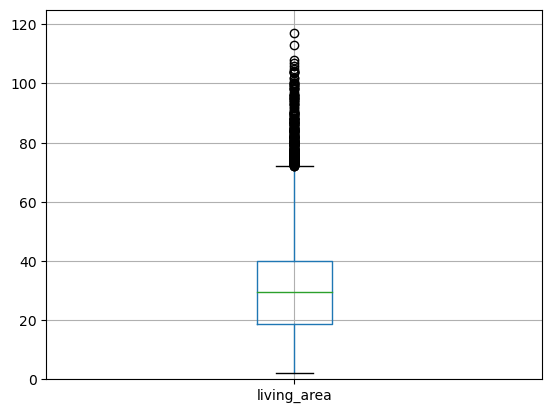

In [41]:
data.boxplot('living_area')

plt.ylim(0, 125)

In [42]:
print('Количество объектов с жилой площадью более 100 м²:',
      data[data['living_area'] > 100]['living_area'].count())
print('Количество объектов с жилой площадью менее 12 м²:',
      data[data['living_area'] < 12]['living_area'].count())

Количество объектов с жилой площадью более 100 м²: 15
Количество объектов с жилой площадью менее 12 м²: 145


Аномальных объектов в сумме получилось не много, поэтому их можно исключить из дальнейшего анализа.

In [43]:
data = data.query('(living_area <= 100) and (living_area >= 12)')

*Столбец rooms*

Посмотрим на показатели описательной статистики и диаграмму размаха.

In [44]:
data['rooms'].describe()

count    22082.000000
mean         1.964677
std          0.925964
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

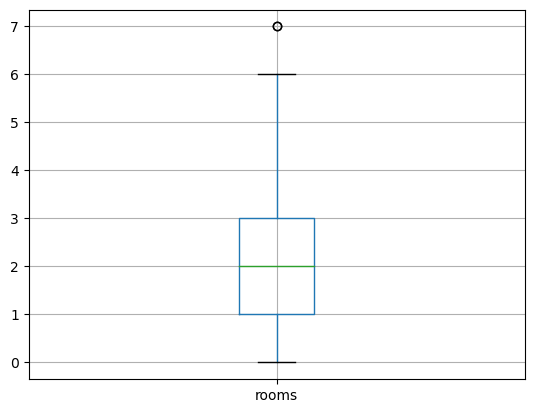

In [45]:
data.boxplot('rooms');

In [46]:
print('Количество объектов с более 6 комнат:',
      data[data['rooms'] > 6]['rooms'].count())
print('Количество объектов с 0 комнат:',
      data[data['rooms'] == 0]['rooms'].count())

Количество объектов с более 6 комнат: 2
Количество объектов с 0 комнат: 190


Аномальных объектов в сумме получилось не много, поэтому их можно исключить из дальнейшего анализа.

In [47]:
data = data.query('(rooms <= 6) and rooms != 0')

*Столбец ceiling_height*

Посмотрим на показатели описательной статистики и диаграмму размаха.

In [48]:
data['ceiling_height'].describe()

count    21890.000000
mean         2.689203
std          0.215607
min          2.000000
25%          2.550000
50%          2.700000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

(2.0, 5.5)

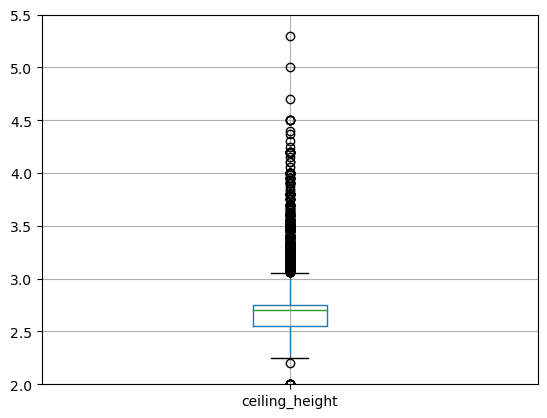

In [49]:
data.boxplot('ceiling_height');
plt.ylim(2, 5.5)

In [50]:
print('Количество объектов с высотой потолка более 3,5 м:',
      data[data['ceiling_height'] > 3.5]['ceiling_height'].count())
print('Количество объектов с высотой потолка менее 2,5 м:',
      data[data['ceiling_height'] < 2.5]['ceiling_height'].count())

Количество объектов с высотой потолка более 3,5 м: 149
Количество объектов с высотой потолка менее 2,5 м: 73


Аномальные объекты можно исключить из дальнейшего анализа.

In [51]:
data = data.query('(ceiling_height >= 2.5) and (ceiling_height <= 3.5)')

*Столбец floors_total*

Посмотрим на показатели описательной статистики и диаграмму размаха.

In [52]:
data['floors_total'].describe()

count    21598.000000
mean        10.756644
std          6.610668
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

(1.0, 40.0)

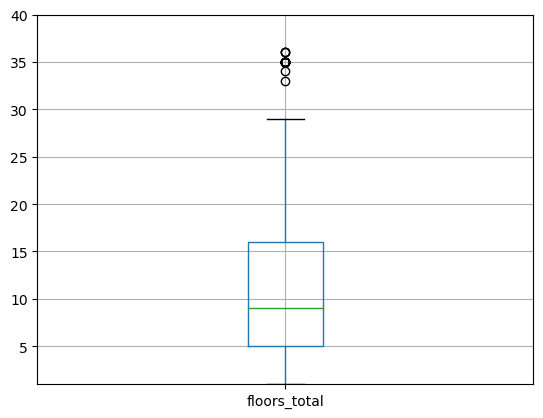

In [53]:
data.boxplot('floors_total');
plt.ylim(1, 40)

In [54]:
print('Количество объектов в зданиях с более 30 этажами:',
      data[data['floors_total'] > 30]['floors_total'].count())

Количество объектов в зданиях с более 30 этажами: 28


Аномальные объекты можно исключить из дальнейшего анализа.

In [55]:
data = data.query('floors_total <= 30')

*Столбец kitchen_area*

Посмотрим на показатели описательной статистики и диаграмму размаха.

In [56]:
data['kitchen_area'].describe()

count    21570.000000
mean         9.671177
std          4.001762
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

(0.0, 60.0)

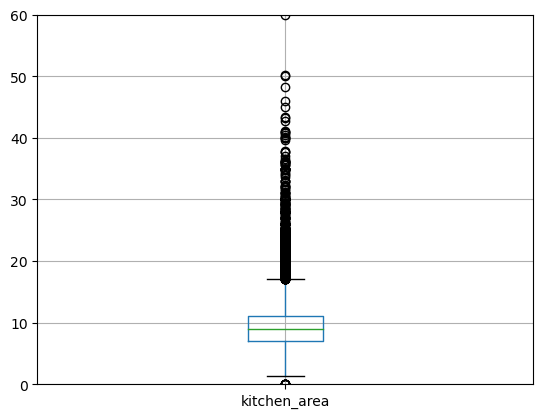

In [57]:
data.boxplot('kitchen_area');
plt.ylim(0, 60)

In [58]:
print('Количество объектов с кухней более 30 м²:',
      data[data['kitchen_area'] > 30]['kitchen_area'].count())

Количество объектов с кухней более 30 м²: 69


Аномальные объекты можно исключить из дальнейшего анализа.

In [59]:
data = data.query('kitchen_area <= 30')

**Посмотрим на общую информацию по массиву данных после предобработки.**

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21501 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21501 non-null  int64         
 1   last_price            21501 non-null  float64       
 2   total_area            21501 non-null  float64       
 3   first_day_exposition  21501 non-null  datetime64[ns]
 4   rooms                 21501 non-null  int64         
 5   ceiling_height        21501 non-null  float64       
 6   floors_total          21501 non-null  float64       
 7   living_area           21501 non-null  float64       
 8   floor                 21501 non-null  int64         
 9   is_apartment          21501 non-null  bool          
 10  studio                21501 non-null  bool          
 11  open_plan             21501 non-null  bool          
 12  kitchen_area          21501 non-null  float64       
 13  balcony         

In [61]:
print('Количество единиц наблюдения сократилось на {:.2%}'.format(1 - (data.shape[0] / old_data_shape)))

Количество единиц наблюдения сократилось на 9.27%


**Добавление новых столбцов в таблицу**

Цена одного квадратного метра - столбец sq_meter_price.

In [62]:
data['sq_meter_price'] = data['last_price'] / data['total_area']

День недели публикации объявления - столбец first_weekday_exposition.

In [63]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Месяц публикации объявления - столбец first_month_exposition.

In [64]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Год публикации объявления - столбец first_year_exposition. 

In [65]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Тип этажа квартиры - столбец floor_type.

In [66]:
def categorize_foor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(categorize_foor, axis=1)

Расстояние до центра города в километрах - столбец cityCenters_nearest_kilometer.

In [67]:
data['cityCenters_nearest_kilometer'] = (data['cityCenters_nearest'] / 1000).round(0)

Проверим новые столбцы.

In [68]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,building_type,sq_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_kilometer
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,более 9 этажей,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.60000,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,3500.0,0.0,3500.0,81.0,более 9 этажей,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.30000,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,5 этажей,92785.714286,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.70,12.0,14.40000,5,False,False,False,9.1,0,Янино-1,NaN,NaN,NaN,3500.0,NaN,3500.0,55.0,более 9 этажей,95065.789474,0,9,2018,другой,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.70,24.0,40.65448,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,3500.0,0.0,3500.0,NaN,более 9 этажей,110544.692737,3,4,2019,другой,12.0


**Выводы по разделу:**

1. В ходе предобработки данных были заполнены пропущенные значения там, где это было возможно. 


2. Среди причин возникших пропусков можно выделить следующие:

    - часть данных продавец целенаправленно не заполнил из-за отсутствия или незнания той или иной характеристики;
    - продавец мог случайно не заполнить какую-то информацию;
    - по картографическим данным, возможно, в системе, предоставляющей эти данные, отсутствовала информация по отдельным населенным пунктам или произошел сбой.


3. По двум столбцам (first_day_exposition и is_apartment) были скорректированы типы данных:

    - По столбцу is_apartment тип данных автоматически скорректировался после заполнения пропусков булевыми значениями.
    - По столбцу first_day_exposition тип данных необходимо было изменить для проведения дальнейшего анализа и возможности обращения к значениям в формате даты и времени.
    
    
4. В столбце locality_name были устранены неявные дубликаты путем приведения названий населенных пунктов к единому виду.


5. Были найдены и устранены редкие и выбивающиеся значения в столбцах last_price, total_area, rooms, ceiling_height, living_area, kitchen_area и floors_total.


6. Добавлены новые столбцы для проведения исследовательского анализа.

### Проведите исследовательский анализ данных

Построим гистограммы для нескольких параметров объектов. Гистограмму для расстояния до ближайшего парка построим только для тех объектов, у которых ближайший парк расположен в радиусе 3 км.

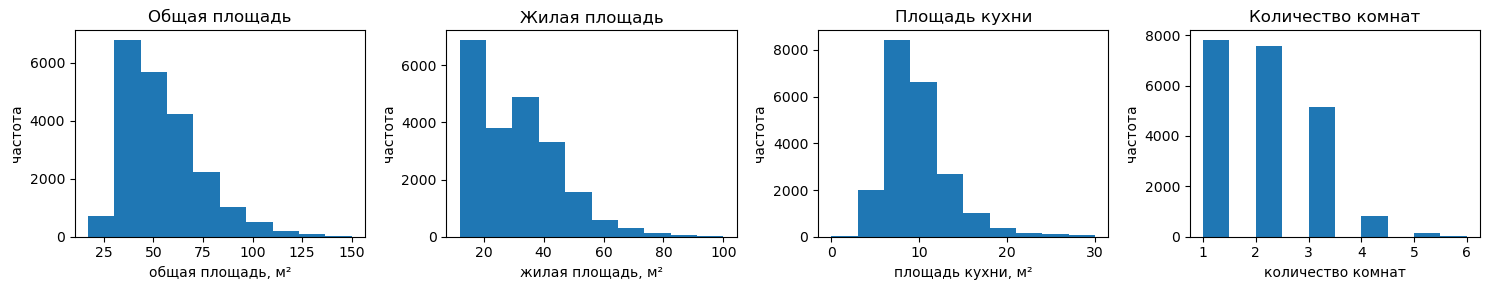

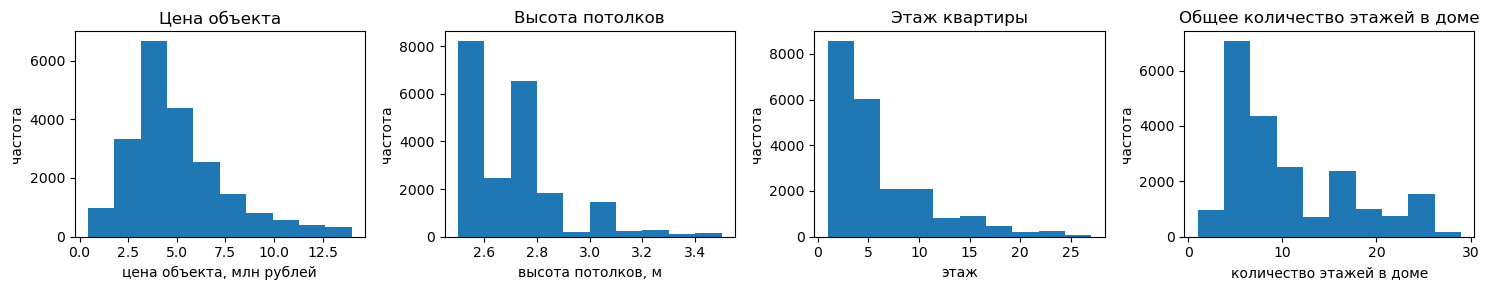

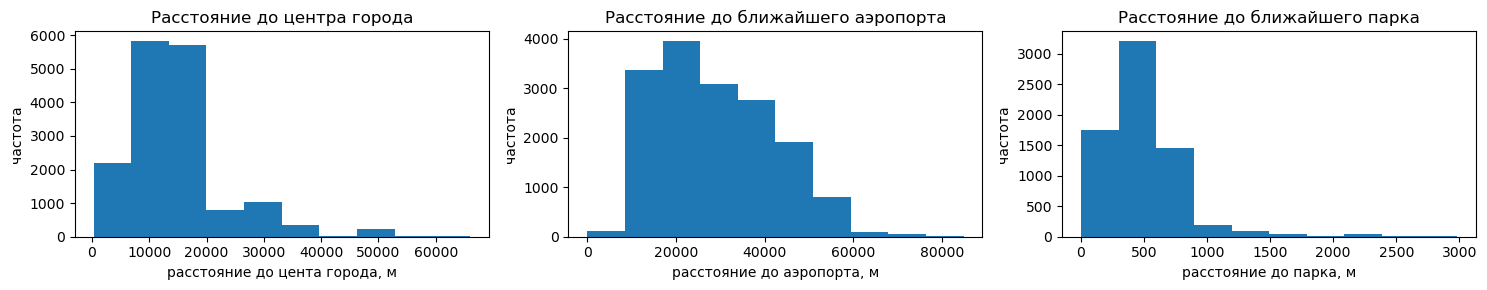

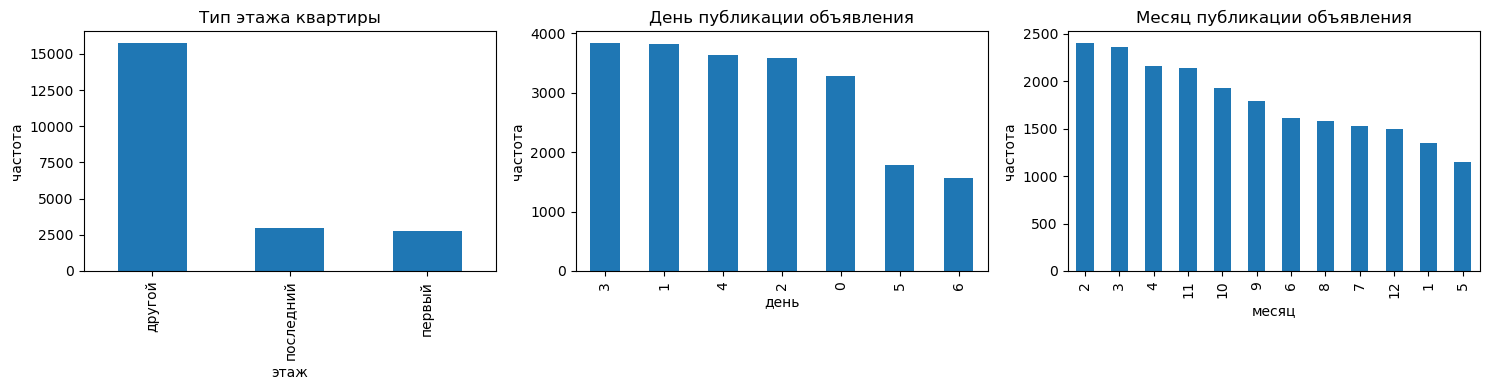

In [69]:
plt.subplot(1, 4, 1)
data['total_area'].plot(kind='hist', title='Общая площадь', figsize=(15, 3))
plt.xlabel('общая площадь, м²')
plt.ylabel('частота')
plt.subplot(1, 4, 2)
data['living_area'].plot(kind='hist', title='Жилая площадь', figsize=(15, 3));
plt.xlabel('жилая площадь, м²')
plt.ylabel('частота')
plt.subplot(1, 4, 3)
data['kitchen_area'].plot(kind='hist', title='Площадь кухни', figsize=(15, 3));
plt.xlabel('площадь кухни, м²')
plt.ylabel('частота')
plt.subplot(1, 4, 4)
data['rooms'].plot(kind='hist', title='Количество комнат', figsize=(15, 3));
plt.xlabel('количество комнат')
plt.ylabel('частота')
plt.tight_layout()
plt.show()

plt.subplot(1, 4, 1)
(data['last_price']/1000000).plot(kind='hist', title='Цена объекта', figsize=(15, 3));
plt.xlabel('цена объекта, млн рублей')
plt.ylabel('частота')
plt.subplot(1, 4, 2)
data['ceiling_height'].plot(kind='hist', title='Высота потолков', figsize=(15, 3));
plt.xlabel('высота потолков, м')
plt.ylabel('частота')
plt.subplot(1, 4, 3)
data['floor'].plot(kind='hist', title='Этаж квартиры', figsize=(15, 3));
plt.xlabel('этаж')
plt.ylabel('частота')
plt.subplot(1, 4, 4)
data['floors_total'].plot(kind='hist', title='Общее количество этажей в доме', figsize=(15, 3));
plt.xlabel('количество этажей в доме')
plt.ylabel('частота')
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
data['cityCenters_nearest'].plot(kind='hist', title='Расстояние до центра города', figsize=(15, 3));
plt.xlabel('расстояние до цента города, м')
plt.ylabel('частота')
plt.subplot(1, 3, 2)
data['airports_nearest'].plot(kind='hist', title='Расстояние до ближайшего аэропорта', figsize=(15, 3));
plt.xlabel('расстояние до аэропорта, м')
plt.ylabel('частота')
plt.subplot(1, 3, 3)
data.query('parks_nearest<3000')['parks_nearest'].plot(kind='hist', title='Расстояние до ближайшего парка', figsize=(15, 3));
plt.xlabel('расстояние до парка, м')
plt.ylabel('частота')
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
(data.groupby('floor_type')['floor_type']
    .count().sort_values(ascending=False)
    .plot(kind='bar', title='Тип этажа квартиры', figsize=(15, 4))
)
plt.xlabel('этаж')
plt.ylabel('частота')
plt.subplot(1, 3, 2)
(data.groupby('weekday_exposition')['weekday_exposition']
    .count().sort_values(ascending=False)
    .plot(kind='bar', title='День публикации объявления', figsize=(15, 4))
)
plt.xlabel('день')
plt.ylabel('частота')
plt.subplot(1, 3, 3)
(data.groupby('month_exposition')['month_exposition']
    .count().sort_values(ascending=False)
    .plot(kind='bar', title='Месяц публикации объявления', figsize=(15, 4))
)
plt.xlabel('месяц')
plt.ylabel('частота')
plt.tight_layout()
plt.show()

**Выводы по гистограммам:**

1. Жилая площадь имеет два пика. Скорее всего, это связано с площадью 1- и 2-комнатных квартир, которых в массиве данных представлено больше всего. Это также подтверждается гистограммой по комнатам: больше всего продавали квартиры с одной и двумя комнатами.


2. Два пика имеет также высота потолка. Это связано с тем, что в типовых домах чаще всего закладывается стандартная высота либо 2,5 м(2,55 м), либо 2,7 м. По гистограмме видно, что в Санкт-Петербурге и Ленинградской области больше домов со стандартной высотой потолка 2,5 м, но также немало и с 2,7 м.


3. Наиболее часто встречающаяся площадь кухни также соответствует стандартным 8-10 м².


4. Больше всего на рынке недвижимости Санкт-Петербурга и Ленинградской области было представлено квартир в 5-этажных домах. Также достаточно много продавалось квартир в 9-этажных домах. Чаще всего продаваемые квартиры были расположены на 1-5 этажах. Это, как раз, и связано  с превалированием объектов в 5-этажках.


5. Наиболее часто продавались квартиры, расположенные на расстоянии 8-20 км от центра города и 15-35 км от аэропорта, имеющие в радиусе 1 км парк.


6. Чаще всего квартиры продавались за цену в диапазоне 3-5 млн рублей, что соответствует медианному значению, которое мы рассчитывали ранее.


7. Чаще всего объявления о продаже публиковались в феврале-марте, реже всего в мае, январе и декабре. Можно предположить, что это связано с наличием длинных выходных в этих месяцах, когда агентства недвижимости не работают. Это подтверждает и относительно небольшое количество размещенных объявлений в субботу и воскресенье.


8. Распределение объектов по типам этажей объясняется тем, что вариантов "других" этажей гораздо больше, чем первого и последнего.


В целом по гистограммам видно, что в изучаемом периоде в Санкт-Петербурге и Ленинградской области продавались квартиры в основном со стандартными характеристиками.

**Скорость продажи квартир**

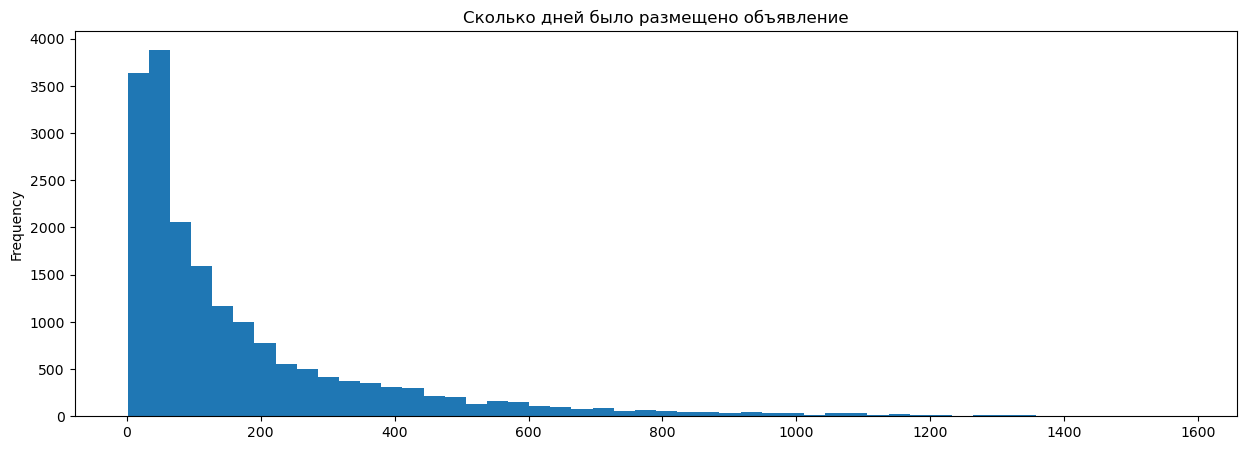

In [70]:
data['days_exposition'].plot(kind='hist', bins=50, title='Сколько дней было размещено объявление', figsize=(15, 5));

In [71]:
data['days_exposition'].describe()

count    18822.000000
mean       175.439645
std        213.887287
min          1.000000
25%         44.000000
50%         93.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0.0, 600.0)

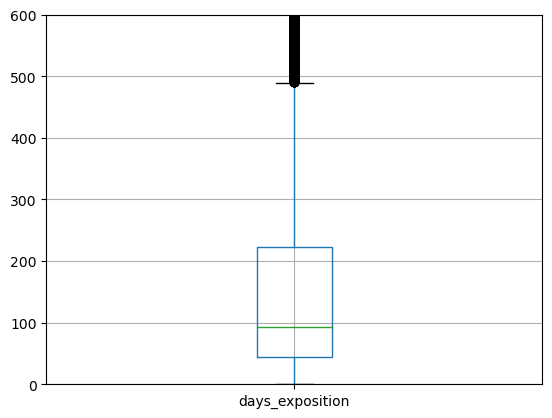

In [72]:
data.boxplot('days_exposition')

plt.ylim(0, 600)

Ранее мы уже обращали внимание на наличие большого числа объявлений, которые находились в активном состоянии несколько лет. И пришли к выводу, что, скорее всего, пользователь просто забыл снять это объявление.

Объекты не были исключены из анализа, поскольку, это реальные квартиры, которые имеет характеристики, необходимые нам для исследовательского анализа. Но для определения среднего времени продажи квартиры аномальные значения мы учитывать не будем.

In [73]:
data.query('days_exposition < 500')['days_exposition'].describe()

count    17318.000000
mean       125.237383
std        118.150347
min          1.000000
25%         40.000000
50%         82.000000
75%        179.000000
max        499.000000
Name: days_exposition, dtype: float64

Таким образом, мы получили более чистые характеристики времени размещения объявлений, по которым можно сделать следующие выводы:

- 75% квартир в Санкт-Петербурге и Ленинградской области продавались в первые полгода после размещения объявления.
- В среднем для того, чтобы найти покупателя, требовалось до 83 дней.

Отдельно стоит отметить, что даже после очистки данных от аномалий вариация признака достаточно велика, что говорит о неоднородности изучаемой совокупности.

**Факторы, влияющие на общую (полную) стоимость объекта**

Посмотрим, какое влияние на стоимость объекта оказывали влияние следующие факторы:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира;
- дата размещения объявления.

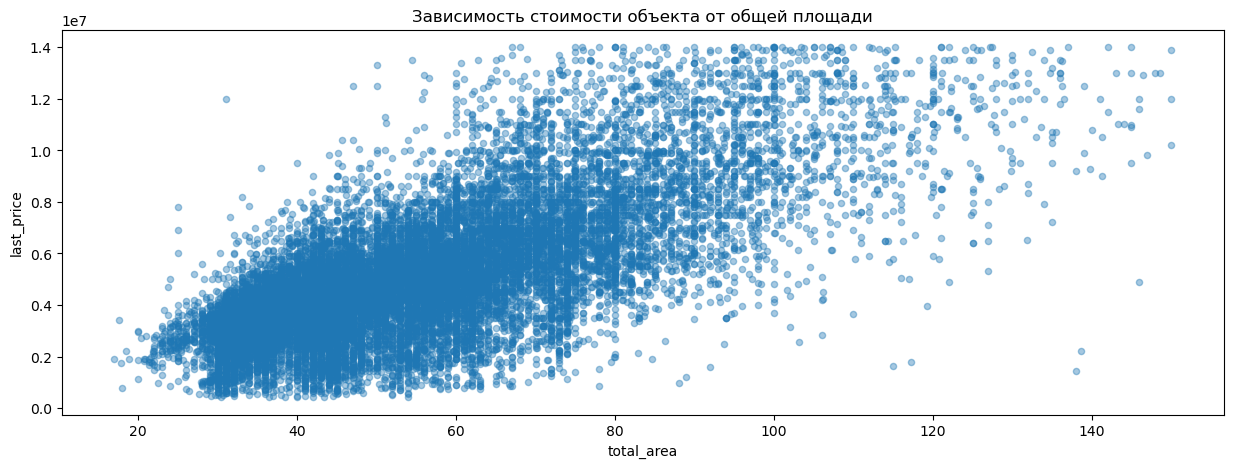

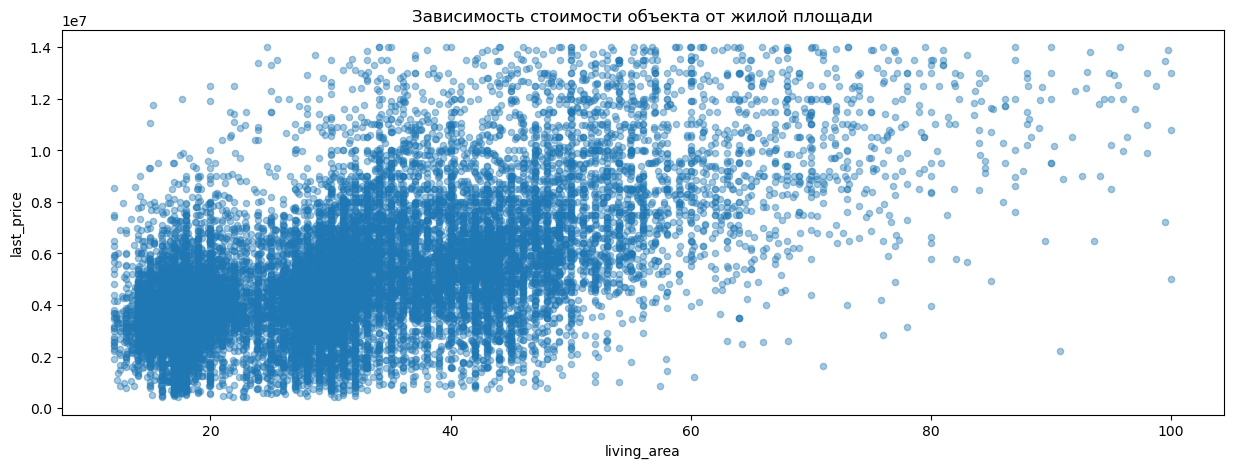

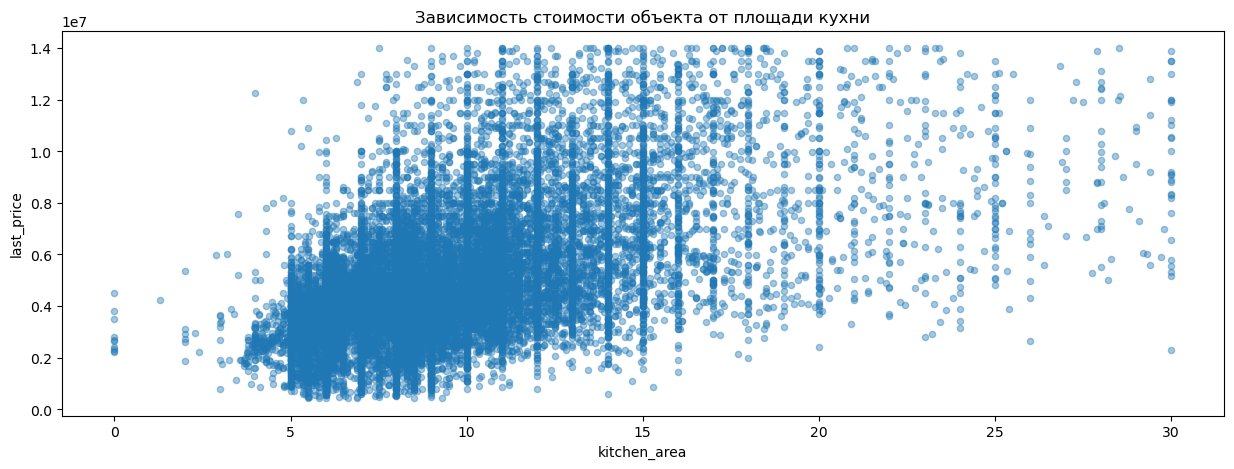

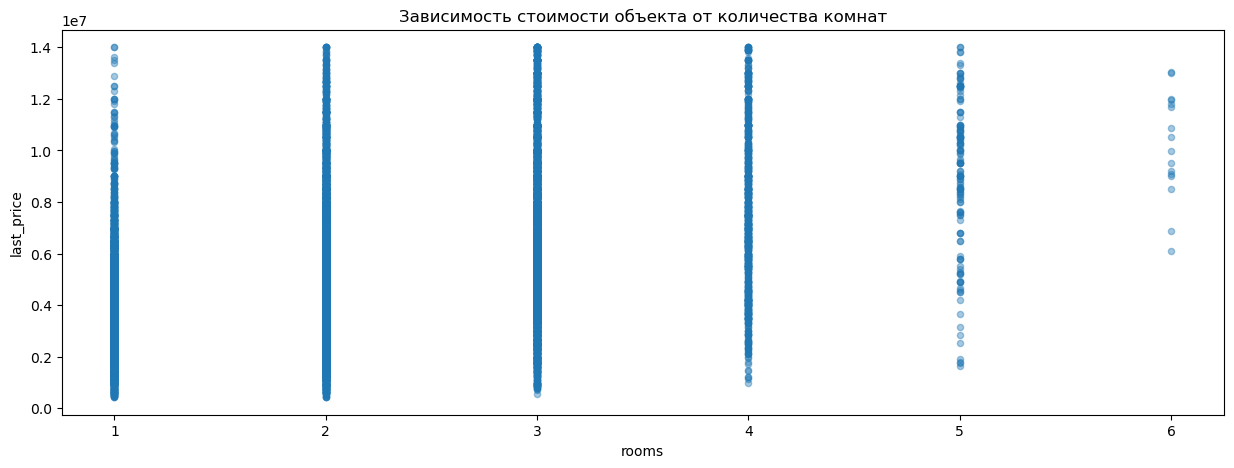

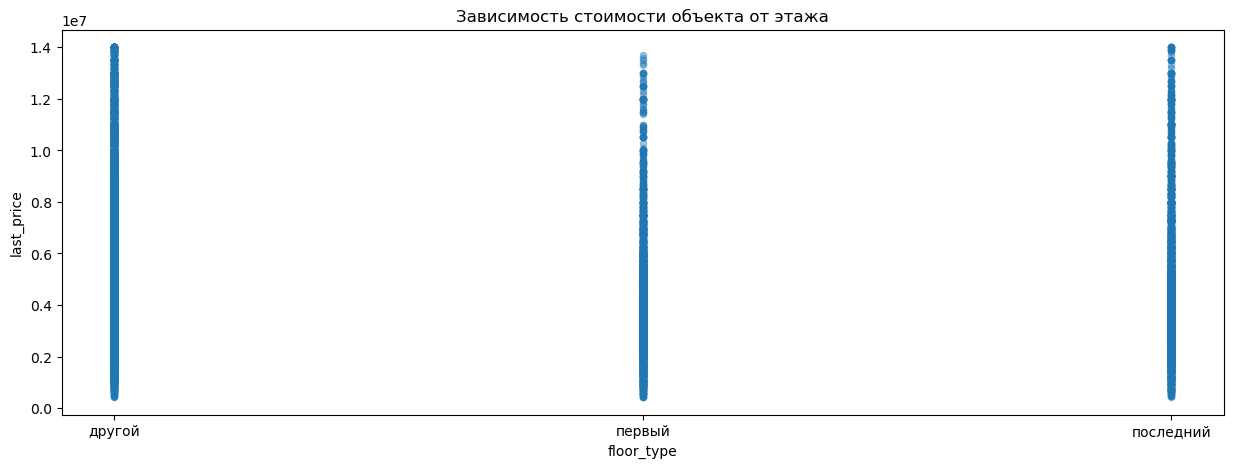

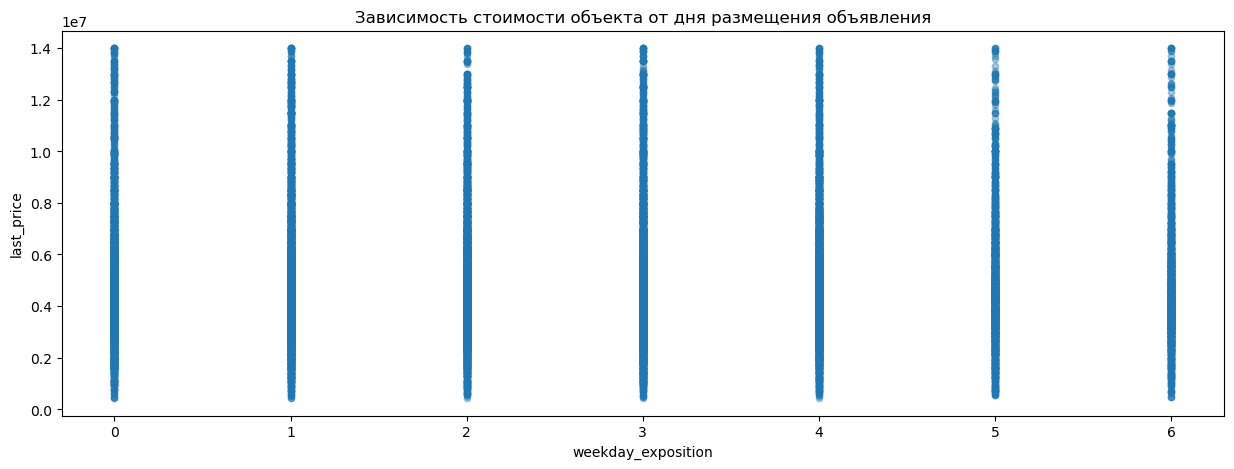

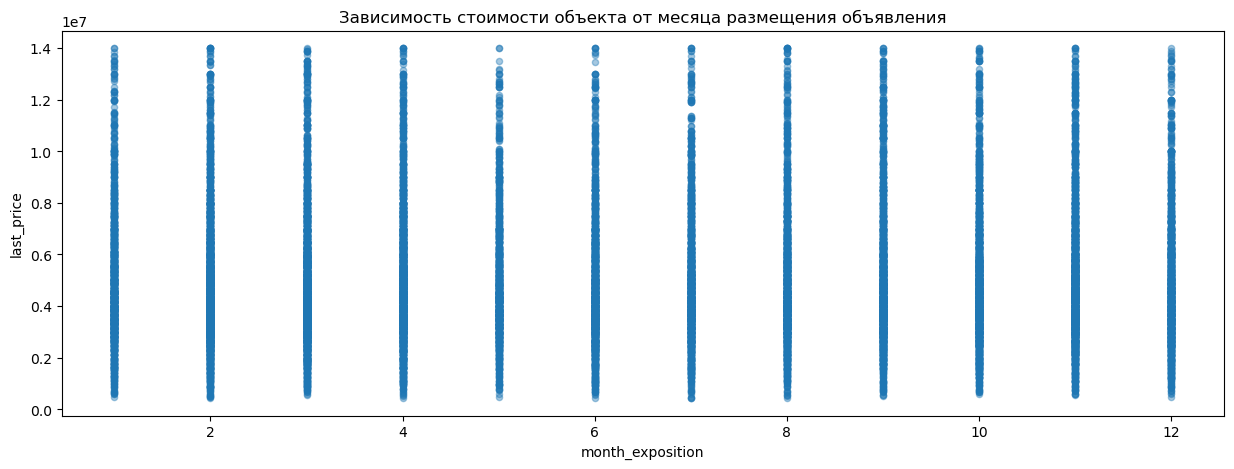

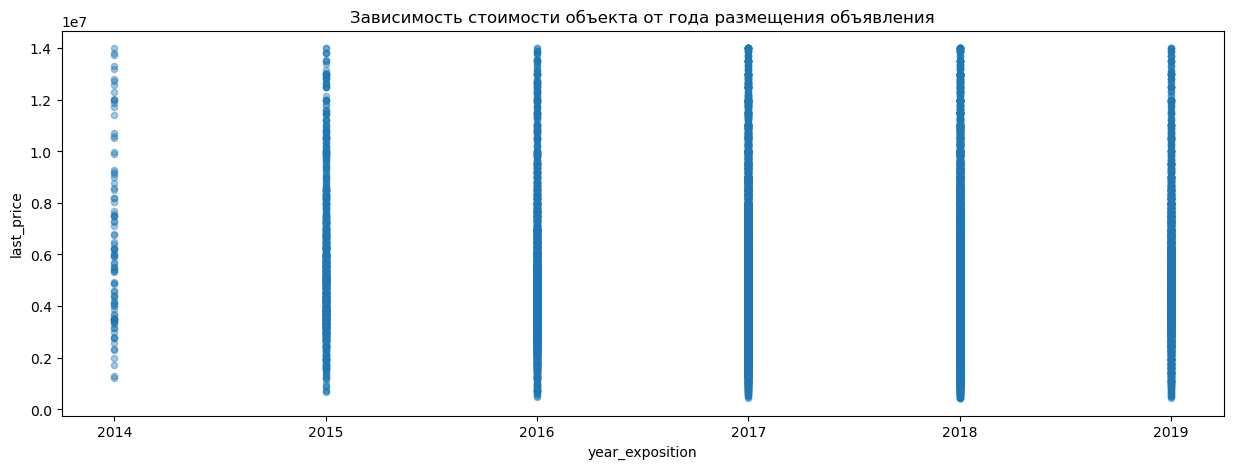

In [74]:
data.plot(x='total_area', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от общей площади', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='living_area', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от жилой площади', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='kitchen_area', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от площади кухни', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='rooms', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от количества комнат', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='floor_type', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от этажа', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='weekday_exposition', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от дня размещения объявления', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='month_exposition', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от месяца размещения объявления', alpha=0.4, figsize=(15, 5)
                     )
plt.show()
data.plot(x='year_exposition', y='last_price', kind='scatter',
                      title='Зависимость стоимости объекта от года размещения объявления', alpha=0.4, figsize=(15, 5)
                     )
plt.show()

In [75]:
data[['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area']].corr()

,last_price,total_area,rooms,living_area,kitchen_area
last_price,1.000000,0.730741,0.466425,0.618709,0.544848
total_area,0.730741,1.000000,0.803105,0.923862,0.518107
rooms,0.466425,0.803105,1.000000,0.886483,0.142325
living_area,0.618709,0.923862,0.886483,1.000000,0.268330
kitchen_area,0.544848,0.518107,0.142325,0.268330,1.000000


**Выводы по зависимостям:**

1. По данным видно, что наибольшее влияние на стоимость объекта среди числовых показателей оказывает общая площадь. Эту связь можно характеризовать как сильную прямую.
2. Такие показатели, как жилая площадь и площадь кухни, имеют среднюю (близкую к сильной) прямую связь со стоимостью объекта недвижимости.
3. Количество комнат оказывает среднее прямое влияние на стоимость объектов.
4. На стоимость оказывает влияние этаж расположения объекта. Гораздо реже остальных среди дорогостоящих встречаются объекты, расположенные на первом этаже, или одноэтажные здания.
5. В 2017-2018 годах чаще размещались более дорогие объекты, чем в другие годы.

**Средняя цена одного квадратного метра в населённых пунктах с наибольшим числом объявлений**

In [76]:
big_amount = data.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count', 'mean']).round()
big_amount.columns = ['Количество объявлений', 'Средняя цена 1 м²']
big_amount.sort_values(by='Количество объявлений', ascending=False).head(10)

,Количество объявлений,Средняя цена 1 м²
locality_name,,
Санкт-Петербург,13814,106456.0
Мурино,550,85261.0
Кудрово,444,95153.0
Шушары,425,78008.0
Всеволожск,385,67071.0
Пушкин,338,100850.0
Колпино,336,75352.0
Парголово,313,90237.0
Гатчина,304,68782.0


Самое большое количество объявлений приходится на Санкт-Петербург, в котором самая высокая цена одного квадратного метра жилья. Она составила в изучаемом периоде 108,2 тысячи рублей за квадратный метр.

Вторая по величине цена квадратного метра зафиксирована в городе Пушкин. Она составила 101,9 тысяч рублей за квадратный метр.

Среди рассматриваемых населенных пунктов самая низкая цена квадратного метра в городе Выборг - 57,9 тысяч рублей.

**Стоимость объектов в Санкт-Петербурге в зависимости от расстояния до центра города**

In [77]:
cc_data_spb = (data.query('locality_name == "Санкт-Петербург"')
               .pivot_table(index='cityCenters_nearest_kilometer', values='sq_meter_price', aggfunc='mean')
               .reset_index()
              )
cc_data_spb

,cityCenters_nearest_kilometer,sq_meter_price
0,0.0,110557.903800
1,1.0,116919.285749
2,2.0,119329.767196
3,3.0,110501.732867
4,4.0,116916.401712
5,5.0,121866.345724
6,6.0,123852.247481
7,7.0,118318.492921
8,8.0,117430.071597
9,9.0,108303.010093


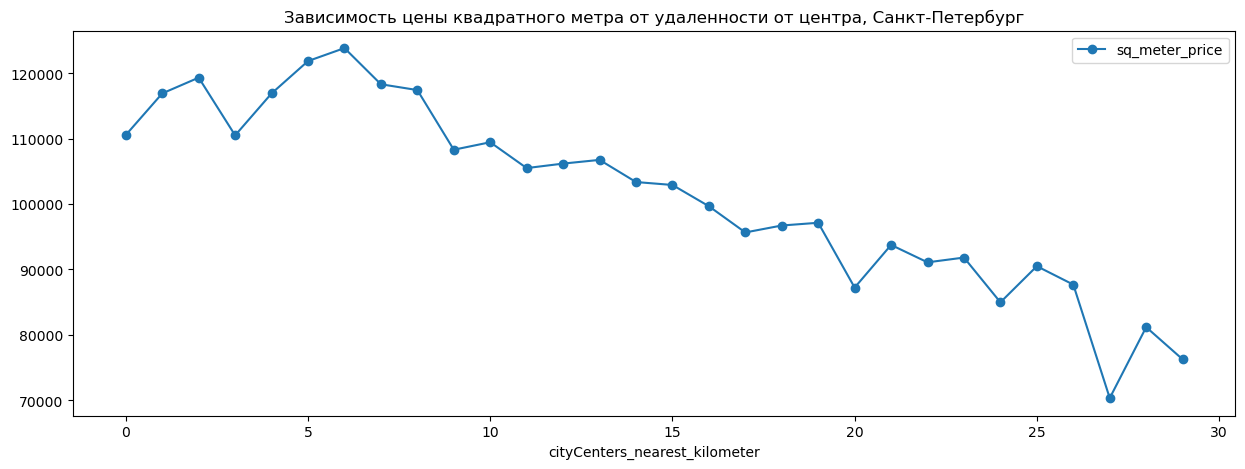

In [78]:
cc_data_spb.plot(x='cityCenters_nearest_kilometer', y='sq_meter_price', style='-o',
                 title='Зависимость цены квадратного метра от удаленности от центра, Санкт-Петербург', figsize=(15, 5)
                 );

По графику видно, что зависимость существует и она нелинейная: цена квадратного метра жилья увеличивается до 6 км, далее при увеличении удаленности от центра города цена снижается.

### Общий вывод

**В результате предобработки были выявлены следующие особенности данных:**

1. В данных имелись пропуски, которые могли возникнуть в результате целенаправленного или случайного не заполнения сведений продавцом, а также ввиду ошибки в системе, предоставляющей картографические сведения (по большинству населенных пунктов информация не была предоставлена).


2. По отдельным показателям имелись аномальные значения, которые могли возникнуть либо из-за ошибки пользователя при введении данных, либо ввиду продажи действительно нестандартных объектов недвижимости.


3. Отсутствовало единообразие в указании названий населенных пунктов. При доработке системы данный раздел можно было бы унифицировать.


**В результате исследовательского анализа были сделаны следующие выводы:**

1. В изучаемом периоде в Санкт-Петербурге и Ленинградской области чаще всего пользователи продавали квартиры со стандартными характеристиками:
- 1 или 2 комнаты;
- общая площадь 30-60 м², жилая площадь 16-20 м² или 30-40 м²;
- высота потолка 2,55 м или 2,7 м;
- размер кухни 8-10 м²;
- расположенные в 5- или 9-этажных домах;
- с наличием парка в радиусе 1 км;
- удаленные от центра города на расстоянии 8-20 км и 15-35 км от аэропорта;
- в ценовом диапазоне 3-5 млн рублей.


2. Наибольшая активность по размещению объявлений о продаже объектов недвижимости зафиксирована в феврале-марте, в будние дни. Скорее всего, это может быть связано с рабочими днями агентств недвижимости.


3. 75% квартир в Санкт-Петербурге и Ленинградской области продавались в первые полгода после размещения объявления. В среднем для того, чтобы найти покупателя, требовалось до 83 дней.


4. Наибольшее количество объявлений приходится на город Санкт-Петербург. В этом городе зафиксирована самая высокая средняя цена одного квадратного метра жилья, составившая в изучаемом периоде 108,2 тысячи рублей. Вторая по величине цена квадратного метра зафиксирована в городе Пушкин (101,9 тысяч рублей за квадратный метр). Среди населенных пунктов с наибольшим числом объявлений самая низкая цена квадратного метра в городе Выборг - 57,9 тысяч рублей.


5. Наибольшее прямое влияние на стоимость объекта оказывают общая площадь, жилая площадь, площадь кухни. Связь стоимости объекта с количеством комнат прямая, средней силы. Этаж расположения объекта также оказывает влияние: среди дорогостоящих объектов гораздо реже встречаются квартиры на первом этаже.


6. Между ценой квадратного метра и удаленностью от центра города существует нелинейная зависимость: цена квадратного метра жилья увеличивается до 6 км, далее при увеличении удаленности от центра города цена снижается.